# Аналитика в крупном интернет-магазине

## Введение

Данное исследование **направлено на** подготовку рекомендаций по увеличению выручки интернет-магазина на основе результатов A/B-теста.

Иследование состоит из следующих **этапов**:

1. [Обзор данных и изучение общей информации](#step_1):
    * [Импорт библиотек](#step_1.1);
    * [Гипотезы по увеличению выручки с основными параметрами](#step_1.2);
    * [Заказы в интернет-магазине](#step_1.3);
    * [Пользователи интернет-магазина](#step_1.4);
    * [Вывод](#step_1.5).
2. [Подготовка данных](#step_2):
    * [Замена названий столбцов](#step_2.1);
    * [Замена типа данных](#step_2.2);
    * [Определение и исправление ошибок в данных](#step_2.3);
    * [Вывод](#step_2.4).
3. [Приоритизация гипотез](#step_3):
    * [Приоритизация фреймворком ICE](#step_3.1);
    * [Приоритизация фреймворком RICE](#step_3.2);
    * [Различия в приоритизации фреймворками ICE и RICE](#step_3.3);
    * [Вывод](#step_3.4).
4. [Анализ A/B-теста](#step_4):
    * [Кумулятивная выручка по группам](#step_4.1);
    * [Кумулятивный средний чек по группам](#step_4.2);
    * [Относительное изменение кумулятивного среднего чека группы B к группе A](#step_4.3);
    * [Кумулятивная конверсия по группам](#step_4.4);
    * [Относительное изменение кумулятивной конверсии группы B к группе A](#step_4.5);
    * [Распределение количества заказов по пользователям](#step_4.6);
    * [Граница для определения аномальных пользователей](#step_4.7);
    * [Распределение стоимостей заказов](#step_4.8);
    * [Граница для определения аномальных заказов по стоимости](#step_4.9);
    * [Cтатистическая значимость различий в показателях](#step_4.10);
    * [Вывод](#step_4.11).
5. [Общий вывод](#step_5).

**Результатом исследования** является рекомендуемое решение по A/B-тесту, направленное на увеличение выручки интернет-магазина.

## Этап 1. Изучение общей информации об имеющихся данных <a id='step_1'></a>

### Импорт библиотек <a id='step_1.1'></a>

In [1]:
import pandas as pd
import numpy as np
from IPython import display

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st

### Гипотезы по увеличению выручки с основными параметрами <a id='step_1.2'></a>

In [2]:
# Прочитаем файл hypothesis.csv с информацией о гипотезах по увеличению выручки и сохраним его в переменной hypothesis
pd.options.display.max_colwidth = 120
hypothesis = pd.read_csv('C:/Users/Public/Jupyter/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
display.display(data=hypothesis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Данные представлены в виде таблицы, включающей в себя 9 строк и 5 столбцов, тип данных у одного столбца - < object >, у четырёх остальных - целочисленные (< int >). Разберём, какие в таблице столбцы, и какую информацию они содержат:
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале;

Чем больше значение `Efforts`, тем дороже проверка гипотезы.

Отметим, что в типе данных нет несоответствий. Однако, для удобства анализа следует привести названия столбцов к нижнему регистру. Отметим, что одинаковое количество значений в столбцах указывает на отсутствие в таблице пропусков.

### Заказы в интернет-магазине <a id='step_1.3'></a>

In [4]:
# Прочитаем файл orders.csv с информацией о заказах и сохраним его в переменной orders
orders = pd.read_csv('C:/Users/Public/Jupyter/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
display.display(data=orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Данные представлены в виде таблицы, включающей в себя 1 197 строк и 5 столбцов, тип данных у двух столбцов - < object >, у остальных трёх столбцов - целочисленный < int >. Разберём, какие в таблице столбцы, и какую информацию они содержат:
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Отметим, что в данной таблице есть несоответствие типа данных в столбце `date` - это столбец с датой. Отметим, что одинаковое количество значений в столбцах указывает на отсутствие в таблице пропусков.

In [6]:
orders['date'].sort_values().unique()

array(['2019-08-01', '2019-08-02', '2019-08-03', '2019-08-04',
       '2019-08-05', '2019-08-06', '2019-08-07', '2019-08-08',
       '2019-08-09', '2019-08-10', '2019-08-11', '2019-08-12',
       '2019-08-13', '2019-08-14', '2019-08-15', '2019-08-16',
       '2019-08-17', '2019-08-18', '2019-08-19', '2019-08-20',
       '2019-08-21', '2019-08-22', '2019-08-23', '2019-08-24',
       '2019-08-25', '2019-08-26', '2019-08-27', '2019-08-28',
       '2019-08-29', '2019-08-30', '2019-08-31'], dtype=object)

Данные о заказах представлены за период с 1 августа по 31 августа 2019 года.

In [7]:
orders['group'].sort_values().unique()

array(['A', 'B'], dtype=object)

A/B-тест включал в себя только 2 группы: A и B.

In [8]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

В данных о выручке заказа достаточно большой разброс: от 50 до 1 294 500 ден.ед. со средним значением 8 350 ден.ед. и медианой 2 978 ден.ед. Такой разброс может быть связан с очень дифференцированным по типу и цене продуктом, представленным в интернет-магазине.

### Пользователи интернет-магазина <a id='step_1.4'></a>

In [9]:
# Прочитаем файл visitors.csv с информацией о пользователях и сохраним его в переменной visitors
visitors = pd.read_csv('C:/Users/Public/Jupyter/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
display.display(data=visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Данные представлены в виде таблицы, включающей в себя 62 строки и 3 столбца, тип данных у двух столбцов - < object >, у одного столбца - целочисленный < int >. Разберём, какие в таблице столбцы, и какую информацию они содержат:
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

Отметим, что в данной таблице есть несоответствие типа данных в столбце `date` - это столбец с датой. Отметим, что одинаковое количество значений в столбцах указывает на отсутствие в таблице пропусков.

In [11]:
visitors['group'].sort_values().unique()

array(['A', 'B'], dtype=object)

In [12]:
visitors['date'].sort_values().unique()

array(['2019-08-01', '2019-08-02', '2019-08-03', '2019-08-04',
       '2019-08-05', '2019-08-06', '2019-08-07', '2019-08-08',
       '2019-08-09', '2019-08-10', '2019-08-11', '2019-08-12',
       '2019-08-13', '2019-08-14', '2019-08-15', '2019-08-16',
       '2019-08-17', '2019-08-18', '2019-08-19', '2019-08-20',
       '2019-08-21', '2019-08-22', '2019-08-23', '2019-08-24',
       '2019-08-25', '2019-08-26', '2019-08-27', '2019-08-28',
       '2019-08-29', '2019-08-30', '2019-08-31'], dtype=object)

Данные о посетителях также представлены за период с 1 августа по 31 августа 2019 года.

### Вывод <a id='step_1.5'></a>

У нас имеется три исходные таблицы с данными о гипотезах по увеличению выручки с их основными параметрами, заказах и пользователях интернет-магазина. Все три датафрейма не имеют пропусков, но два из них требуют изменения типов данных в столбцах с датой. Также необходимо приведение названий столбцов в подходящий для анализа вид в таблице с гипотезами.

Имеется 9 гипотез по увеличению выручки:
1. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
2. Запустить собственную службу доставки, что сократит срок доставки заказов;
3. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
4. Изменить структуру категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар;
5. Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей;
6. Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов;
7. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию;
8. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
9. Запустить акцию, дающую скидку на товар в день рождения.

Видим, что A/B-тест включал в себя только 2 группы: A и B. По ним и приведены результаты теста. Все данные с результатам представлены за период с 1 августа по 31 августа 2019 года.

Также отметим, что в данных о выручке заказа имеется достаточно большой разброс: от 50 до 1 294 500 ден.ед. со средним значением 8 350 ден.ед. и медианой 2 978 ден.ед. Такой разброс может быть связан с очень дифференцированным по типу и цене продуктом, представленным в интернет-магазине.

## Этап 2. Подготовка данных <a id='step_2'></a>

### Замена названий столбцов <a id='step_2.1'></a>

При анализе информации об исходных датасетах мы обратили внимание на то, что для дальнейшего анализа необходимо привести названия столбцов таблицы hypothesis к одному (нижнему) регистру.

In [13]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Все названия столбцов имеют подходящий для анализа вид.

### Замена типа данных <a id='step_2.2'></a>

Выше мы указали столбцы, которые требуют изменения типа данных: это данные с датой.

In [14]:
# Функция замены типа данных для столбцов с датой:
def to_date(df, column):
    df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')

In [15]:
# Заменяем тип данных для столбцов с датой:
to_date(orders, 'date')
to_date(visitors, 'date')

Проверим, что тип данных заменён везде, где это требовалось.

In [16]:
display.display(data=hypothesis.info())
print()
display.display(data=orders.info())
print()
display.display(data=visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB

<class 'pandas.core.frame.Data

### Определение и исправление ошибок в данных <a id='step_2.3'></a>

Проверим отсутствие пропусков в данных.

In [17]:
hypothesis.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

In [18]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [19]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

Проверим отсутствие дубликатов в данных.

In [20]:
hypothesis.duplicated().sum()

0

In [21]:
orders.duplicated().sum()

0

In [22]:
visitors.duplicated().sum()

0

Проверим, что одни и те же пользователи, оформившие заказ, не попали в две разные группы (группу A и группу B), т.к. это одно из условий достоверного проведения A/B-теста.

In [23]:
orders_both = (orders
                   .pivot_table(index='visitorId',
                                columns='group',
                                values='revenue',
                                aggfunc='count')
                   .reset_index()
                   .query('A == 1 & B == 1')
              )
len(orders_both['visitorId'].unique()) / len(orders['visitorId'].unique()) * 100

3.394762366634336

У нас имеется 3,4% пользоватлей в выборке, которые попали и в группу A, и в группу B при тестировании. Для чистоты эксперимента и выводов их следовало бы исключить, но мы также помним, что выборка групп A и B при A/B-тесте должна быть примерно одинаковой для обоих групп. Проверим, не навредит ли удаление данных о пользователях в обоих группах.

In [24]:
# Доля группы A до удаления пользователей в обоих группах
len(orders[orders['group'] == 'A']['visitorId'].unique()) / len(orders['visitorId'].unique()) * 100

48.78758486905917

In [25]:
# Доля группы B до удаления пользователей в обоих группах
len(orders[orders['group'] == 'B']['visitorId'].unique()) / len(orders['visitorId'].unique()) * 100

56.83802133850631

In [26]:
# Доля группы A после удаления пользователей в обоих группах
(len(orders[(orders['group'] == 'A') & (orders['visitorId'].isin(orders_both['visitorId'])!=True)]['visitorId'].unique()) / 
 len(orders['visitorId'].unique()) * 100)

45.39282250242483

In [27]:
# Доля группы B после удаления пользователей в обоих группах
(len(orders[(orders['group'] == 'B') & (orders['visitorId'].isin(orders_both['visitorId'])!=True)]['visitorId'].unique()) / 
 len(orders['visitorId'].unique()) * 100)

53.44325897187196

Удаление пользователей из результатов теста сильно ухудшит долю группы A. Более того, в таблице о посещениях эти пользователи попали в обе группы, причём нам не известно, в какие даты. Таким образом, удалив их, либо сократив одну из групп и оставив их в другой, мы не сможем учесть это при работе с данными о посещениях. В связи с этим, данные следует оставить, но принимать во внимание то, что есть погрешности в результате, связанные с попаданием одних людей в разные группы при тесте.

### Вывод <a id='step_2.4'></a>

На этапе подготовки данных названия столбцов в таблице hypothesis были приведены к нижнему регистру; была проведена замена типа данных там, где это необходимо (в столбцах с датой таблиц orders и visitors). Обработки пропусков и дубликатов не требовалось.

Однако, было выявлено, что в A/B-тестировании принимали участи пользователи, попавшие в обе тестируемые группы: их было около 3,5% от всех пользователей. Для чистоты эксперимента и выводов их следовало бы исключить, но поскольку выборка групп A и B при A/B-тесте должна также быть примерно одинаковой для обоих групп, а исключение пользователей из обоих групп чревато созданием искусственного перевеса по количеству пользователей в группе B, было принято иное решение. Удаление пользователей из результатов теста сильно ухудшит долю группы A. Более того, в таблице о посещениях эти пользователи попали в обе группы, причём нам не известно, в какие даты. Таким образом, удалив их, либо сократив одну из групп и оставив их в другой, мы не сможем учесть это при работе с данными о посещениях. В связи с этим, данные следует оставить, но принимать во внимание то, что есть погрешности в результате, связанные с попаданием одних людей в разные группы при тесте.

Данные готовы к анализу.

## Этап 3. Приоритизация гипотез <a id='step_3'></a>

### Приоритизация фреймворком ICE <a id='step_3.1'></a>

Рассчитаем показатель ICE по формуле:
$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [28]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).reset_index(drop=True)

,hypothesis,ICE
0,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


*Наиболее перспективные* гипотезы по ICE:

- Запустить акцию, дающую скидку на товар в день рождения;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

*Менее перспективными* гипотезами являются следующие:

- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию;
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- Запустить собственную службу доставки, что сократит срок доставки заказов.

*Самыми неприоритетными* гипотезами по ICE являются:

- Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов;
- Изменить структуру категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар;
- Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей.

### Приоритизация фреймворком RICE <a id='step_3.2'></a>

Рассчитаем показатель RICE по формуле:
$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

*Наиболее перспективные* гипотезы по RICE:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

*Менее перспективными* гипотезами являются следующие:
- Запустить акцию, дающую скидку на товар в день рождения;
- Изменить структуру категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар;

*Самыми неприоритетными* гипотезами по RICE являются:

- Запустить собственную службу доставки, что сократит срок доставки заказов;
- Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов;
- Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей.

In [29]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).reset_index(drop=True)

,hypothesis,RICE
0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
1,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
2,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
4,"Запустить акцию, дающую скидку на товар в день рождения",16.2
5,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
6,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
7,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Различия в приоритизации фреймворками ICE и RICE <a id='step_3.3'></a>

Для того, чтобы увидеть причины различий в приоритизации гипотез разными фреймворками (ICE и RICE), графически представим параметры гипотез.

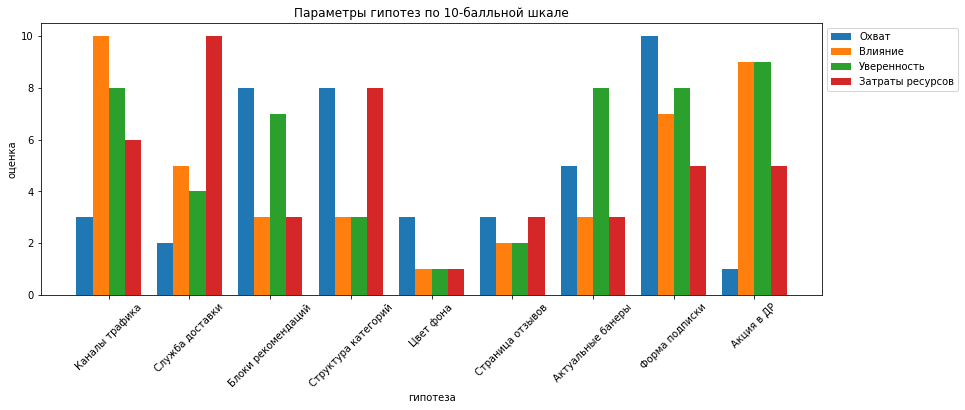

In [30]:
fig, ax = plt.subplots(figsize=(14,5))
ax.set(title='Параметры гипотез по 10-балльной шкале',
       xlabel='гипотеза', ylabel='оценка')
x1 = np.arange(0,9) - 0.3
x2 = np.arange(0,9) - 0.1
x3 = np.arange(0,9) + 0.1
x4 = np.arange(0,9) + 0.3
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], 
           ['Каналы трафика', 'Служба доставки', 'Блоки рекомендаций', 'Структура категорий', 'Цвет фона', 'Страница отзывов', 
            'Актуальные банеры', 'Форма подписки', 'Акция в ДР'], 
           rotation=45)
ax.bar(x1, hypothesis['reach'], width=0.2, label='Охват')
ax.bar(x2, hypothesis['impact'], width=0.2, label='Влияние')
ax.bar(x3, hypothesis['confidence'], width=0.2, label='Уверенность')
ax.bar(x4, hypothesis['efforts'], width=0.2, label='Затраты ресурсов')
ax.grid=True
ax.legend(bbox_to_anchor=(1, 1));

Самой приоритетной по показателям ICE (влияние, уверенность и затраты ресурсов) была гипотеза о **запуске акции**, дающей скидку на товар **в день рождения**. Но, как мы видим по графику, она имеет самый низкий показатель охвата пользователей. В связи с этим, по фреймворку RICE данная гипотеза опустилась на пятое место по приоритетности.

В то же время самый большой показатель охвата аудитории поднял гипотезу о добавлении **формы подписки** на все основные страницы с третьего места по приоритету (фреймворк ICE) на первое место (фреймворк RICE).

Средний показатель охвата переместил гипотезу о добвлении двух новых **каналов привлечения трафика** со второго (фреймворк ICE) на третье место (фреймворк RICE) списка приоритетности.

Высокие показатели охвата вывели гипотезы о добавлении **блоков рекомендаций** товаров на сайт интернет-магазина и показе на главной странице **баннеров с актуальными акциями и распродажами** в список наиболее перспективных.

Все остальные гипотезы обладают меньшей приоритетность по обоим фреймворкам, поскольку соответствующие им показатели охвата оказались невысокими, и это слабо изменило результаты приоритизации без учета охвата аудитории.

### Вывод <a id='step_3.4'></a>

*Наиболее перспективные* гипотезы по факторам влияния, уверенности и затрат ресурсов:

- Запустить акцию, дающую скидку на товар в день рождения;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

*Менее перспективными* гипотезами являются следующие:

- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию;
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- Запустить собственную службу доставки, что сократит срок доставки заказов.

Самой приоритетной по показателям ICE (влияние, уверенность и затраты ресурсов) была гипотеза о **запуске акции**, дающей скидку на товар **в день рождения**. Но, как мы видим по графику, она имеет самый низкий показатель охвата пользователей. В связи с этим, по фреймворку RICE данная гипотеза опустилась на пятое место по приоритетности.

В то же время самый большой показатель охвата аудитории поднял гипотезу о добавлении **формы подписки** на все основные страницы с третьего места по приоритету (фреймворк ICE) на первое место (фреймворк RICE).

Средний показатель охвата переместил гипотезу о добвлении двух новых **каналов привлечения трафика** со второго (фреймворк ICE) на третье место (фреймворк RICE) списка приоритетности.

Высокие показатели охвата вывели гипотезы о добавлении **блоков рекомендаций** товаров на сайт интернет-магазина и показе на главной странице **баннеров с актуальными акциями и распродажами** в список наиболее перспективных.

Таким образом, с учётом фактора охвата аудитории и ранее учтённых факторов, *наиболее перспективными* гипотезами являются:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

*Менее перспективными* гипотезами являются следующие:
- Запустить акцию, дающую скидку на товар в день рождения;
- Изменить структуру категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар;

Все остальные гипотезы обладают меньшей приоритетность по обоим фреймворкам, поскольку соответствующие им показатели охвата оказались невысокими, и это слабо изменило результаты приоритизации без учета охвата аудитории.

## Этап 4. Анализ A/B-теста <a id='step_4'></a>

### Кумулятивная выручка по группам <a id='step_4.1'></a>

Для анализа кумулятивной выручки по группам сгруппируем данные и соберём необходимые кумулятивные значения.

In [31]:
# Создадим массив уникальных пар значений дат и групп A/B-теста
dates_groups = orders[['date','group']].drop_duplicates()

# Соберём агрегированные кумулятивные данные о заказах по дням
orders_agg = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                orders['group'] == x['group'])]
                                .agg({'date': 'max', 'group': 'max', 'transactionId': pd.Series.nunique,
                                      'visitorId': pd.Series.nunique, 'revenue': 'sum'}), 
                                axis=1).sort_values(by=['date','group'])

# Соберём агрегированные кумулятивные данные о покупателях по дням
visitors_agg = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                    visitors['group'] == x['group'])]
                                  .agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}), 
                                  axis=1).sort_values(by=['date','group'])

# Объединим кумулятивные данные в одной таблице и переименуем столбцы
cum_data = orders_agg.merge(visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])
cum_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Мы собрали кумулятивные значения в одной таблице cum_data. Теперь построим график, иллюстрирующий кумулятивную выручку по разным группам.

In [32]:
# Кумулятивное количество заказов и кумулятивная выручка по дням в группе А и группе B
cum_revenue_A = cum_data.query('group == "A"')[['date', 'revenue', 'orders']]
cum_revenue_B = cum_data.query('group == "B"')[['date', 'revenue', 'orders']]

In [33]:
# Функция построения сравнительного графика
def plot_AtoB(dfA, dfB, column, date):
    ax.plot(dfA[date], dfA[column], '.-', label='A')
    ax.plot(dfB[date], dfB[column], '.-', label='B')
    xlabels = ax.xaxis.get_ticklabels()
    for label in xlabels:
        label.set_rotation(45)
    ax.grid()
    ax.legend();

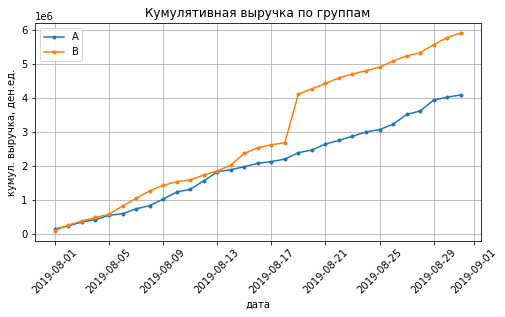

In [34]:
# Построение графика
fig, ax = plt.subplots(figsize=(8,4))
ax.set(title='Кумулятивная выручка по группам', xlabel='дата', ylabel='кумул. выручка, ден.ед.')
plot_AtoB(cum_revenue_A, cum_revenue_B, 'revenue', 'date')

Выручка почти равномерно увеличивается в течение всего теста. Причём первые 5 дней в обоих группах наблюдалось примерно равное значение выручки. А затем графики кумулятивной выручки в обеих группах в нескольких точках резко начали расти(в группе B скачки были более ярко выражены).

Мы не можем с точностью назвать причины, поскольку это может указывать как на рост количества заказов, так и на покупку пользователями дорогостоящих товаров. Выявление причин требует дальнейшего анализа.

### Кумулятивный средний чек по группам <a id='step_4.2'></a>

Для того, чтобы изучить динамику среднего чека по группам, необходимо разделить кумулятивную выручку на кумулятивное число заказов.

In [35]:
cum_revenue_A['rev_per_order'] = cum_revenue_A['revenue'] / cum_revenue_A['orders']
cum_revenue_B['rev_per_order'] = cum_revenue_B['revenue'] / cum_revenue_B['orders']

Теперь построим график, иллюстрирующий кумулятивный средний чек по разным группам.

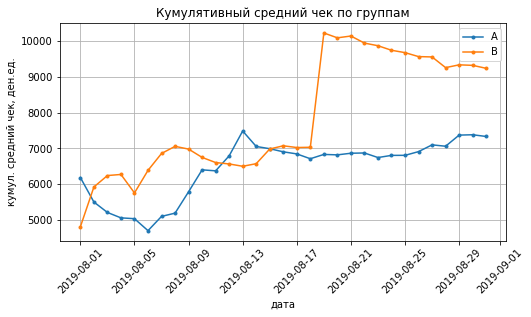

In [36]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set(title='Кумулятивный средний чек по группам', xlabel='дата', ylabel='кумул. средний чек, ден.ед.')
plot_AtoB(cum_revenue_A, cum_revenue_B, 'rev_per_order', 'date')

Средний чек в группе A становится равномерным примерно с середины до конца теста, а в группе B после значительного скачка начинает медленно сокращаться. Возможно, это связано с крупными покупками. До середины августа всплески и падения наблюдались в обеих группах (в группе B больше, чем в группе A), но колебания происходили примерно возле одной отметки в 7 000 ден.ед.

### Относительное изменение кумулятивного среднего чека группы B к группе A <a id='step_4.3'></a>

Для исследования относительного изменения кумулятивного среднего чека группы B к группе A нам необходимо объединить таблицы и рассчитать отношение.

In [37]:
# Объединение таблиц
merged_сum_revenue = pd.merge(cum_revenue_A, cum_revenue_B, left_on='date', right_on='date', how='left', suffixes=['_A', '_B'])

# Расчёт отношения средних чеков
merged_сum_revenue['rev_per_order_BtoA'] = (merged_сum_revenue['rev_per_order_B'] / merged_сum_revenue['rev_per_order_A']) - 1

Отобразим изменение графически.

In [38]:
# Функция построения относительного графика
def plot_merged_AtoB(df, column, date):
    ax.plot(df[date], df[column], '.-')
    ax.axhline(y=0, color='black', linestyle='--')
    xlabels = ax.xaxis.get_ticklabels()
    for label in xlabels:
        label.set_rotation(45)
    ax.grid();

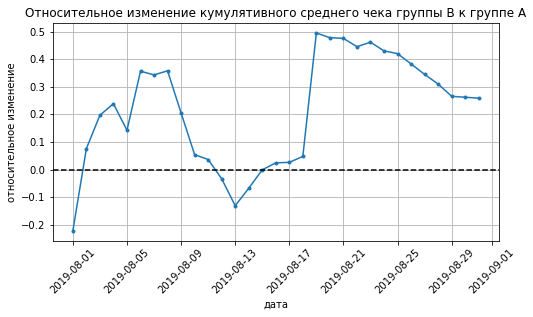

In [39]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set(title='Относительное изменение кумулятивного среднего чека группы B к группе A', 
       xlabel='дата', ylabel='относительное изменение')
plot_merged_AtoB(merged_сum_revenue, 'rev_per_order_BtoA', 'date')

Во многих точках график различия между группами начинает резко скакать: особо сильный всплеск наблюдается 19 августа 2019 года. Это говорит о существовании выбросов в виде продажи очень дорогих товаров в эту дату.

### Кумулятивная конверсия по группам <a id='step_4.4'></a>

Для того, чтобы изучить конверсию по группам, необходимо разделить количество заказов на количество посетителей в таблице с кумулятивными данными, и разделить их по группам. После чего мы можем построить график.

In [40]:
cum_data['conversion'] = cum_data['orders']/cum_data['visitors']
cum_data_A = cum_data.query('group == "A"')
cum_data_B = cum_data.query('group == "B"')

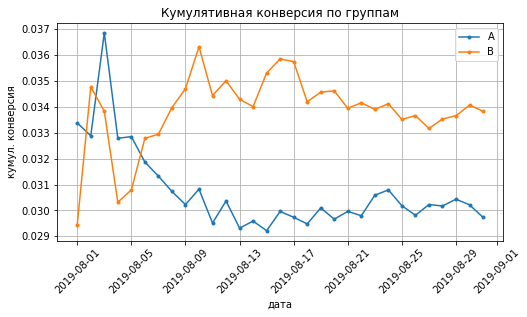

In [41]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set(title='Кумулятивная конверсия по группам', xlabel='дата', ylabel='кумул. конверсия')
plot_AtoB(cum_data_A, cum_data_B, 'conversion', 'date')

Без установления масштаба кажется, что конверсия постоянно колеблется, но мы видим, что колебания с 8 августа 2019 года несущественны для обеих групп (порядка 1-2%). Для наглядности зададим масштаб графика.

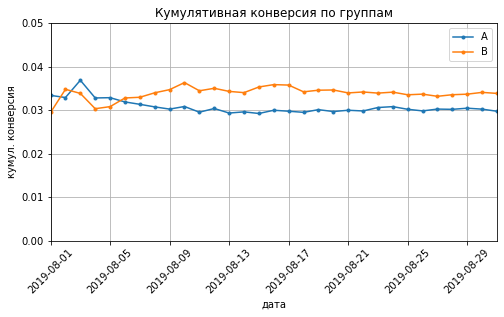

In [42]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set(title='Кумулятивная конверсия по группам', xlabel='дата', ylabel='кумул. конверсия')
plot_AtoB(cum_data_A, cum_data_B, 'conversion', 'date')
ax.axis([pd.to_datetime("2019-08-01"), pd.to_datetime('2019-08-31'), 0, 0.05]);

С 6 августа 2019 года график кумулятивной конверсии по группам выглядит почти симметрично. До 4 августа 2019 года наблюдался сильный всплекс в обоих группах. В дальнейшие периоды конверсии обеих групп установились на определённом уровне (примерно после 9-11 августа) с явным преобладанием кумулятивной конверсии группы B над кумулятивной конверсией группы A.

### Относительное изменение кумулятивной конверсии группы B к группе A <a id='step_4.5'></a>

Для исследования относительного изменения кумулятивной конверсии группы B к группе A нам необходимо объединить таблицы и рассчитать отношение.

In [43]:
# Объединение таблиц
merged_сum_conversion = pd.merge(cum_data_A[['date', 'conversion']], cum_data_B[['date', 'conversion']], 
                                 left_on='date', right_on='date', how='left', suffixes=['_A', '_B'])

# Расчёт отношения коверсий
merged_сum_conversion['conversion_BtoA'] = (merged_сum_conversion['conversion_B'] / merged_сum_conversion['conversion_A']) - 1

Отобразим изменение графически, также масштабировав оси.

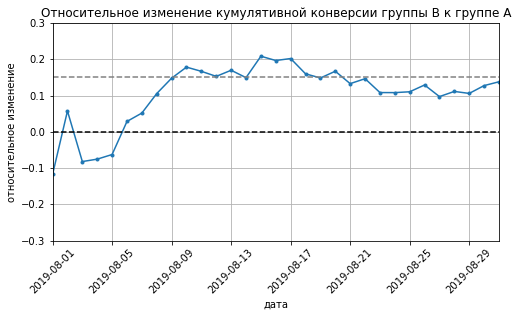

In [44]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set(title='Относительное изменение кумулятивной конверсии группы B к группе A', 
       xlabel='дата', ylabel='относительное изменение')
plot_merged_AtoB(merged_сum_conversion, 'conversion_BtoA', 'date')
ax.axhline(y=0.15, color='grey', linestyle='--')
ax.axis([pd.to_datetime("2019-08-01"), pd.to_datetime('2019-08-31'), -0.3, 0.3]);

В начале теста группа B проигрывала группе A (кроме 02.08.2019), но с 06.08.2019 вырвалась вперёд и предвосходила группу A приблизительно на 15%. Возможно, это и говорит о явном успехе группы B, в сравнении с группой A. Но чтобы это утверждать, необходимо проанализировать аномалии.

### Распределение количества заказов по пользователям <a id='step_4.6'></a>

Поскольку пользователи, совершившие много заказов, очень сильно могут повлиятьна параметр конверсии, завышая показатель, необходимо изучить распределение количества заказов по пользователям.

In [45]:
# Создадим таблицу с количеством заказов по пользователям
orders_by_visitors = (orders
                       .drop(['group', 'revenue', 'date'], axis=1)
                       .groupby('visitorId', as_index=False)
                       .agg({'transactionId': pd.Series.nunique})
                     )

# Переименуем колонки
orders_by_visitors.columns = ['visitorId', 'orders']

In [46]:
# Функция для построения точечного графика
def scatter_plot(df, column):
    x_values = pd.Series(range(0,len(df)))
    ax.scatter(x_values, df[column])
    ax.grid();

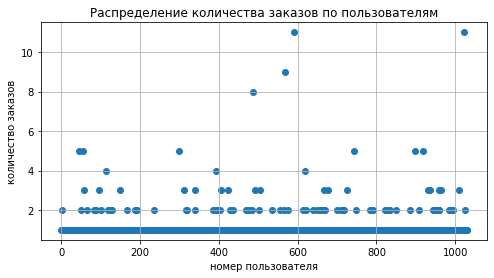

In [47]:
# Построим график
fig, ax = plt.subplots(figsize=(8,4))
ax.set(title='Распределение количества заказов по пользователям', xlabel='номер пользователя', ylabel='количество заказов')
scatter_plot(orders_by_visitors, 'orders')

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-5 заказами тоже значительна. Также есть пользователи, которые совершали 8, 9 и 11 заказов.

Поскольку точная доля пользователей с 2-5 заказами неизветна, мы пока не можем утверждать, что они являются аномалиями.

### Граница для определения аномальных пользователей <a id='step_4.7'></a>

Для определения границы, отсекающей аномальных пользователей, посчитаем 90-й, 95-й и 99-й перцентили количества заказов на пользователя.

In [48]:
# Функция определения 90-го, 95-го и 99-го перцентилей
def percentile(df, column):
    perc90 = np.percentile(df[column], 90)
    perc95 = np.percentile(df[column], 95)
    perc99 = np.percentile(df[column], 99)
    print('90-й, 95-й и 99-й перцентили равны, соответственно, {:.1f}, {:.1f}, {:.1f}.'.format(perc90, perc95, perc99))

In [49]:
print('Показатели количества заказов на пользователя:')
percentile(orders_by_visitors, 'orders')

Показатели количества заказов на пользователя:
90-й, 95-й и 99-й перцентили равны, соответственно, 1.0, 2.0, 4.0.


Не более 1% пользователей оформляли 4 и более заказов; не более 5% - 2 и более заказов. И 10% пользователей заказывали более 1 раза.

Таким образом, свыше 2 (3 заказа) - это нижняя граница аномального числа заказов. Именно по ней в дальнейшем будем "очищать" данные.

### Распределение стоимостей заказов <a id='step_4.8'></a>

Ранее при анализе выручки мы обратили внимание на то, что в отдельные даты по группам имеются очень сильные всплески. Они также могут быть связаны с аномалиями. Изучим более подробно распределение стоимостей заказов.

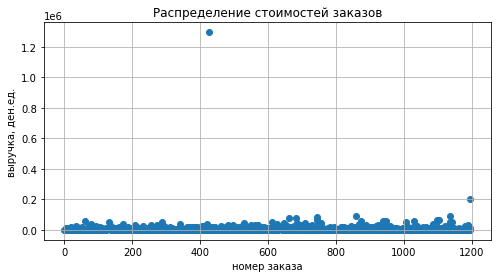

In [50]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set(title='Распределение стоимостей заказов', xlabel='номер заказа', ylabel='выручка, ден.ед.')
scatter_plot(orders, 'revenue')

Действительно имеется два аномально дорогих заказа (около 200 000 ден.ед. и свыше 1 200 000 ден.ед.). Немного масштабируем график, отобразив заказы до 200 000 ден.ед., чтобы выявить ещё некоторое количество аномалий.

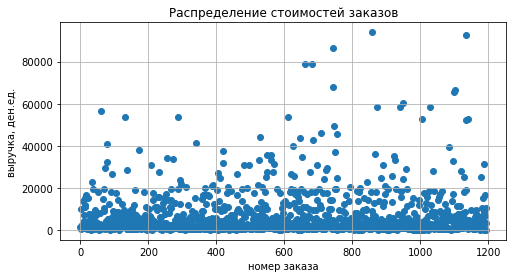

In [51]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set(title='Распределение стоимостей заказов', xlabel='номер заказа', ylabel='выручка, ден.ед.')
scatter_plot(orders[orders['revenue'] <= 200000], 'revenue')

По укрупнённому графику заказов до 200 000 ден.ед. видим несколько аномальных значений свыше 20 000-40 000 ден.ед. Однако, как и в случае с заказами на пользователя, выручка также требует расчёта границы аномальных значений.

### Граница для определения аномальных заказов по стоимости <a id='step_4.9'></a>

Для определения границы, отсекающей аномальные заказы по стоимости, посчитаем 90-й, 95-й и 99-й перцентили стоимостей заказов.

In [52]:
print('Показатели стоимостей заказов:')
percentile(orders, 'revenue')

Показатели стоимостей заказов:
90-й, 95-й и 99-й перцентили равны, соответственно, 18168.0, 28000.0, 58233.2.


Не более 1% заказов дороже 58 233 ден.ед.; не более 5% - дороже 28 000 ден.ед. И 10% заказов было совершено на сумму свыше 18 168 ден.ед.

Таким образом, свыше 30 000 ден.ед. - это нижняя граница аномальной стоимости заказов. Именно по ней в дальнейшем будем "очищать" данные.

### Cтатистическая значимость различий в показателях <a id='step_4.10'></a>

#### Cтатистическая значимость различий в конверсии. "Сырые" данные

Рассчитаем статистическую значимость различий в конверсии между группами по «сырым» данным (то есть до удаления аномальных пользователей и заказов).

Создадим сводную таблицу, включающую в себя все необходимые для определения статистической значимости показатели, а также выведем переменные orders_by_visitors_A и orders_by_visitors_B, в которых для пользователей, совершивших хотя бы один заказ, будет указано число заказов.

In [53]:
# Количество пользователей в выбранную дату в каждой группе
visitors_daily_A = visitors.query('group == "A"')[['date', 'visitors']]
visitors_daily_A.columns = ['date', 'visitors_date_A']

visitors_daily_B = visitors.query('group == "B"')[['date', 'visitors']]
visitors_daily_B.columns = ['date', 'visitors_date_B']

# количество пользователей до выбранной даты включительно в каждой группе
visitors_cum_A = visitors_daily_B.apply(lambda x: visitors_daily_A[visitors_daily_A['date'] <= x['date']]
                                        .agg({'date': 'max', 'visitors_date_A': 'sum'}), axis=1)
visitors_cum_A.columns = ['date', 'visitors_cum_A']

visitors_cum_B = visitors_daily_B.apply(lambda x: visitors_daily_B[visitors_daily_B['date'] <= x['date']]
                                        .agg({'date': 'max', 'visitors_date_B': 'sum'}), axis=1)
visitors_cum_B.columns = ['date', 'visitors_cum_B']

In [54]:
# Количество заказов и суммарная выручка в выбранную дату в каждой группе
orders_daily_A = (orders
                      .query('group == "A"')[['date', 'transactionId', 'visitorId', 'revenue']]
                      .groupby('date', as_index=False)
                      .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
                 )
orders_daily_A.columns = ['date', 'orders_date_A', 'revenue_date_A']

orders_daily_B = (orders
                      .query('group == "B"')[['date', 'transactionId', 'visitorId', 'revenue']]
                      .groupby('date', as_index=False)
                      .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
                 )
orders_daily_B.columns = ['date', 'orders_date_B', 'revenue_date_B']

# Суммарное число заказов и суммарная выручка до выбранной даты включительно в каждой группе
orders_cum_A = orders_daily_A.apply(lambda x: orders_daily_A[orders_daily_A['date'] <= x['date']]
                                    .agg({'date': 'max', 'orders_date_A': 'sum', 'revenue_date_A': 'sum'}), 
                                    axis=1).sort_values(by=['date'])
orders_cum_A.columns = ['date', 'orders_cum_A', 'revenue_cum_A']

orders_cum_B = orders_daily_B.apply(lambda x: orders_daily_B[orders_daily_B['date'] <= x['date']]
                                    .agg({'date': 'max', 'orders_date_B': 'sum', 'revenue_date_B': 'sum'}), 
                                    axis=1).sort_values(by=['date'])
orders_cum_B.columns = ['date', 'orders_cum_B', 'revenue_cum_B']

In [55]:
# Соединим все таблицы с полученными значениями
all_data_merged = (orders_daily_A
                       .merge(orders_daily_B, left_on='date', right_on='date', how='left')
                       .merge(orders_cum_A, left_on='date', right_on='date', how='left')
                       .merge(orders_cum_B, left_on='date', right_on='date', how='left')
                       .merge(visitors_daily_A, left_on='date', right_on='date', how='left')
                       .merge(visitors_daily_B, left_on='date', right_on='date', how='left')
                       .merge(visitors_cum_A, left_on='date', right_on='date', how='left')
                       .merge(visitors_cum_B, left_on='date', right_on='date', how='left')
                  )

# Число совершённых заказов для пользователей, которые заказывали хотя бы 1 раз, в каждой группе 
orders_by_visitors_A = (orders
                            .query('group == "A"')
                            .groupby('visitorId', as_index=False)
                            .agg({'transactionId': pd.Series.nunique})
                       )
orders_by_visitors_A.columns = ['visitorId', 'orders']

orders_by_visitors_B = (orders
                            .query('group == "B"')
                            .groupby('visitorId', as_index=False)
                            .agg({'transactionId': pd.Series.nunique})
                       )
orders_by_visitors_B.columns = ['visitorId', 'orders']

Объявим переменные sample_A и sample_B, в которых пользователям из разных групп будет соответствовать количество заказов. Далее чтобы получить конверсию в группе, поделим сумму заказов на число пользователей.

In [56]:
sample_A = pd.concat([orders_by_visitors_A['orders'], pd.Series(0, index=np.arange(all_data_merged['visitors_date_A'].sum() - 
                    len(orders_by_visitors_A['orders'])), name='orders')],axis=0)

sample_B = pd.concat([orders_by_visitors_B['orders'], pd.Series(0, index=np.arange(all_data_merged['visitors_date_B'].sum() - 
                    len(orders_by_visitors_B['orders'])), name='orders')],axis=0)

Применим критерий Манна-Уитни. Также выведем относительный прирост конверсии группы B: (конверсия группы B/конверсия группы A) - 1.

In [57]:
print('Значение p-value для конверсий: {:.3f}'.format(st.mannwhitneyu(sample_A, sample_B)[1]))
print('Относительный прирост конверсии группы B: {:.3f}'.format((sample_B.mean()/sample_A.mean()) - 1))

Значение p-value для конверсий: 0.008
Относительный прирост конверсии группы B: 0.138


P-value меньше 0,05, потому нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный прирост конверсии группы B к конверсии группы A равен 13,8%.

Тем не менее, расчёты были выполнены на "сырых" данных. Требуется также изучить статистически значимые различия среднего чека в группах и проанализировать "очищенные" данные.

#### Cтатистическая значимость различий в среднем чеке заказа. "Сырые" данные

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, применим критерий Манна-Уитни на данные о выручке с заказов. И, так же как и при анализе конверсии, рассчитаем относительные различия в среднем чеке между группами.

In [58]:
print('Значение p-value для среднего чека: {:.3f}'.format(st.mannwhitneyu(orders.query('group == "A"')['revenue'], 
                                                        orders.query('group == "B"')['revenue'])[1]))
print('Относительный прирост среднего чека группы B: {:.3f}'
      .format((orders.query('group == "B"')['revenue'].mean()/
               orders.query('group == "A"')['revenue'].mean()) - 1))

Значение p-value для среднего чека: 0.365
Относительный прирост среднего чека группы B: 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако, относительный прирост среднего чека группы B к среднему чеку группы A равен 25,9%.

Это может быть связано с аномалиями. Проведём анализ статистической значимости различий в показателях на "очищенных" данных.

#### Cтатистическая значимость различий в конверсии. "Очищенные" данные

Вспомним, что на предыдущих этапах мы приняли за аномальных пользователей тех, кто совершил более 2 заказов или совершил заказ за 30 000 ден.ед. и более. Исключив аномальные значения, мы уберём от 1 до 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.

Узнаем, сколько всего аномальных пользователей было в интернет-магазине.

In [59]:
# Срезы данных для аномальных пользователей
visitors_many_orders = pd.concat([orders_by_visitors_A.query('orders > 2')['visitorId'], 
                                  orders_by_visitors_B.query('orders > 2')['visitorId']], axis = 0)
visitors_expens_orders = orders.query('revenue >= 30000')['visitorId']

# Число аномальных пользователей
anomal_visitors = pd.concat([visitors_many_orders, visitors_expens_orders], axis = 0).drop_duplicates().sort_values()
len(anomal_visitors)

68

Получили 68 аномальных пользователей. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным.

In [60]:
# Выборки количества заказов по пользователям для каждой группы
sample_A_filt = pd.concat([orders_by_visitors_A[np.logical_not(orders_by_visitors_A['visitorId'].isin(anomal_visitors))]
                           ['orders'], pd.Series(0, index=np.arange(all_data_merged['visitors_date_A'].sum() - 
                           len(orders_by_visitors_A['orders'])),name='orders')],axis=0)

sample_B_filt = pd.concat([orders_by_visitors_B[np.logical_not(orders_by_visitors_B['visitorId'].isin(anomal_visitors))]
                           ['orders'], pd.Series(0, index=np.arange(all_data_merged['visitors_date_B'].sum() - 
                           len(orders_by_visitors_B['orders'])),name='orders')],axis=0)

# Cтатистический критерий Манна-Уитни к конверсии для "очищенных" данных
print('Значение p-value для конверсий: {:.3f}'.format(st.mannwhitneyu(sample_A_filt, sample_B_filt)[1]))

# Относительный прирост конверсии группы B для "очищенных" данных
print('Относительный прирост конверсии группы B: {:.3f}'.format((sample_B_filt.mean()/sample_A_filt.mean()) - 1))

Значение p-value для конверсий: 0.007
Относительный прирост конверсии группы B: 0.172


Как и в случае с "сырыми данными", статистическая значимость различий в конверсии между группами достигнута. Сегмент B значительно лучше сегмента A (в среднем, на 17,2% выше показатель конверсии).

#### Cтатистическая значимость различий в среднем чеке заказа. "Очищенные" данные

Аналогично посчитаем статистическую значимость различий в среднем чеке между группами по очищенным данным.

In [61]:
# Cтатистический критерий Манна-Уитни к среднему чеку для "очищенных" данных
print('Значение p-value для среднего чека: {:.3f}'.format(st.mannwhitneyu(
    orders[np.logical_and(orders['group'] == "A", np.logical_not(orders['visitorId'].isin(anomal_visitors)))]['revenue'],
    orders[np.logical_and(orders['group'] == "B", np.logical_not(orders['visitorId'].isin(anomal_visitors)))]['revenue'])[1]))

# Относительный прирост среднего чека группы B для "очищенных" данных
print('Относительный прирост среднего чека группы B: {:.3f}'.format(
    (orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(anomal_visitors)))]['revenue'].mean()/
     orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(anomal_visitors)))]['revenue']
     .mean()) - 1))

Значение p-value для среднего чека: 0.360
Относительный прирост среднего чека группы B: -0.023


P-value практически не изменился: он значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако, относительный прирост среднего чека группы B к среднему чеку группы A значительно изменился. Мы наблюдаем, что без аномальны пользователей средний чек в группе B немного ниже среднего чека в группе A (разница около 2%). Но это статистически незначимое отличие.

#### Выводы по результатам теста

Исследование различий основных показателей в группах на статистическую значимость показал следующее:
- Есть статистически значимое различие по конверсии между группами как по «сырым», так и по отфильтрованным от аномалий данным;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия конверсии между группами сообщает, что результаты группы B стабильно лучше группы A;
- График различия среднего чека говорит о том, что результаты группы B, как правило, немного лучше группы A.

Исходя из обнаруженных фактов, тест следует остановить и зафиксировать победу группы B. Продолжать тест нет смысла, потому что основные показатели зафиксировались возле определённых отметок, и изменений при прочих равных условиях не прогнозируется.

### Вывод <a id='step_4.11'></a>

Анализ результатов A/B-теста позволил сделать следующие выводы.

Выручка почти равномерно увеличивается в течение всего теста. Причём первые 5 дней в обоих группах наблюдалось примерно равное значение выручки. А затем графики кумулятивной выручки в обеих группах в нескольких точках резко начали расти (в группе B скачки были более ярко выражены). Далее в процессе анализа было выявлено, что подобные скачки обусловлены и аномальными пользователями, которые сделали очень много заказов (3 и более - до 11 заказов), и пользователями, купившими очень дорогие товары (заказы 30 000 ден.ед. и более).

Средний чек в группе A становится равномерным примерно с середины до конца теста, а в группе B после значительного скачка начинает медленно сокращаться. Возможно, это также связано с крупными покупками. До середины августа всплески и падения наблюдались в обеих группах (в группе B больше, чем в группе A), но колебания происходили примерно возле одной отметки в 7 000 ден.ед. Во многих точках график различия между группами начинает резко скакать: особо сильный всплеск наблюдается 19 августа 2019 года. Это также говорит о существовании выбросов в виде продажи очень дорогих товаров в эту дату.

Колебания конверсии по обеим группам с 8 августа 2019 года были несущественны для обеих групп (порядка 1-2%). С 6 августа 2019 года график кумулятивной конверсии по группам выглядит почти симметрично. До 4 августа 2019 года наблюдался сильный всплекс в обоих группах. В дальнейшие периоды конверсии обеих групп установились на определённом уровне (примерно после 9-11 августа) с явным преобладанием кумулятивной конверсии группы B над кумулятивной конверсией группы A. В начале теста группа B проигрывала группе A (кроме 02.08.2019), но с 06.08.2019 вырвалась вперёд и предвосходила группу A приблизительно на 15%. Возможно, это и говорит о явном успехе группы B, в сравнении с группой A. Но чтобы это утверждать, нами также были проанализированы аномалии.

Также были исследованы различия основных показателей в группах на статистическую значимость с "сырыми" данными и с данными, "очищенными" от аномальных значений. Анализ показал следующее:
- Есть статистически значимое различие по конверсии между группами как по «сырым», так и по отфильтрованным от аномалий данным;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия конверсии между группами сообщает, что результаты группы B стабильно лучше группы A;
- График различия среднего чека говорит о том, что результаты группы B, как правило, немного лучше группы A.

Таким образом, исходя из обнаруженных фактов, тест следует остановить и зафиксировать победу группы B. Продолжать тест нет смысла, потому что основные показатели зафиксировались возле определённых отметок, и изменений при прочих равных условиях не прогнозируется.

## Общий вывод <a id='step_5'></a>

Данное исследование, направленное на подготовку рекомендаций по увеличению выручки интернет-магазина на основе результатов A/B-теста, проведённого с 1 августа по 31 августа 2019 года, имеет следующее заключение.

У нас имеется **9 гипотез по увеличению выручки**. *Наиболее перспективные* из них по факторам влияния, уверенности и затрат ресурсов:

1. Запустить акцию, дающую скидку на товар в день рождения;
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

*Менее перспективными* гипотезами являются следующие:

4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию;
5. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
6. Запустить собственную службу доставки, что сократит срок доставки заказов.

Самой приоритетной по показателям ICE (влияние, уверенность и затраты ресурсов) была гипотеза о запуске акции, дающей скидку на товар в день рождения. Но она имеет самый низкий показатель охвата пользователей. В связи с этим, по фреймворку RICE данная гипотеза опустилась на пятое место по приоритетности. В то же время самый большой показатель охвата аудитории поднял гипотезу о добавлении формы подписки на все основные страницы с третьего места по приоритету (фреймворк ICE) на первое место (фреймворк RICE). Средний показатель охвата переместил гипотезу о добвлении двух новых каналов привлечения трафика со второго (фреймворк ICE) на третье место (фреймворк RICE) списка приоритетности. Высокие показатели охвата вывели гипотезы о добавлении блоков рекомендаций товаров на сайт интернет-магазина и показе на главной странице баннеров с актуальными акциями и распродажами в список наиболее перспективных.

Таким образом, с учётом фактора охвата аудитории и ранее учтённых факторов, *наиболее перспективными* гипотезами являются:

1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

*Менее перспективными* гипотезами являются следующие:

5. Запустить акцию, дающую скидку на товар в день рождения;
6. Изменить структуру категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар.

Все остальные гипотезы обладают меньшей приоритетность по обоим фреймворкам, поскольку соответствующие им показатели охвата оказались невысокими, и это слабо изменило результаты приоритизации без учета охвата аудитории.

Предварительный анализ **результатов A/B-теста** показал, что он включал в себя только 2 группы: A и B. Но в A/B-тестировании также принимали участие пользователи, попавшие в обе тестируемые группы: их было около 3,5% от всех пользователей. Для чистоты эксперимента и выводов их следовало бы исключить, но поскольку выборка групп A и B при A/B-тесте должна также быть примерно одинаковой для обоих групп, а исключение пользователей из обоих групп чревато созданием искусственного перевеса по количеству пользователей в группе B, было принято иное решение. Удаление пользователей из результатов теста сильно ухудшит долю группы A. Более того, в таблице о посещениях эти пользователи попали в обе группы, причём нам не известно, в какие даты. Таким образом, удалив их, либо сократив одну из групп и оставив их в другой, мы не сможем учесть это при работе с данными о посещениях. В связи с этим, данные решили оставить, но следует принимать во внимание то, что есть погрешности в результате, связанные с попаданием одних людей в разные группы при тестировании.

Анализ динамики **выручки** имеет достаточно большой разброс: от 50 до 1 294 500 ден.ед. со средним значением 8 350 ден.ед. и медианой 2 978 ден.ед. Такой разброс может быть связан с очень дифференцированным по типу и цене продуктом, представленным в интернет-магазине. При этом выручка почти равномерно увеличивается в течение всего теста. Причём первые 5 дней в обоих группах наблюдалось примерно равное значение выручки. А затем графики кумулятивной выручки в обеих группах в нескольких точках резко начали расти (в группе B скачки были более ярко выражены). Далее в процессе анализа было выявлено, что подобные скачки обусловлены и аномальными пользователями, которые сделали очень много заказов (3 и более - до 11 заказов), и пользователями, купившими очень дорогие товары (заказы 30 000 ден.ед. и более).

**Средний чек** в группе A становится равномерным примерно с середины до конца теста, а в группе B после значительного скачка начинает медленно сокращаться. Возможно, это также связано с крупными покупками. До середины августа всплески и падения наблюдались в обеих группах (в группе B больше, чем в группе A), но колебания происходили примерно возле одной отметки в 7 000 ден.ед. Во многих точках график различия между группами начинает резко скакать: особо сильный всплеск наблюдается 19 августа 2019 года. Это также говорит о существовании выбросов в виде продажи очень дорогих товаров в эту дату.

Колебания **конверсии** по обеим группам с 8 августа 2019 года были несущественны для обеих групп (порядка 1-2%). С 6 августа 2019 года график кумулятивной конверсии по группам выглядит почти симметрично. До 4 августа 2019 года наблюдался сильный всплекс в обоих группах. В дальнейшие периоды конверсии обеих групп установились на определённом уровне (примерно после 9-11 августа) с явным преобладанием кумулятивной конверсии группы B над кумулятивной конверсией группы A. В начале теста группа B проигрывала группе A (кроме 02.08.2019), но с 06.08.2019 вырвалась вперёд и предвосходила группу A приблизительно на 15%. Возможно, это и говорит о явном успехе группы B, в сравнении с группой A. Но чтобы это утверждать, нами также были проанализированы аномалии.

Также были исследованы **различия** основных показателей **в группах на статистическую значимость** с "сырыми" данными и с данными, "очищенными" от аномальных значений. Анализ показал следующее:

1. Есть статистически значимое различие по конверсии между группами как по «сырым», так и по отфильтрованным от аномалий данным;
2. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
3. График различия конверсии между группами сообщает, что результаты группы B стабильно лучше группы A;
4. График различия среднего чека говорит о том, что результаты группы B, как правило, немного лучше группы A.

Таким образом, исходя из обнаруженных фактов, **тест рекомендуется остановить и зафиксировать победу группы B**. Продолжать тест нет смысла, потому что основные показатели достигли и колеблются возле определённых отметок, и изменений при прочих равных условиях не прогнозируется.